In [1]:
#IMPORT LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [3]:
# lOAD DATASET

In [4]:
x_data=np.linspace(0,10,1000000)

In [5]:
x_data.shape

(1000000,)

In [6]:
x_data

array([0.000000e+00, 1.000001e-05, 2.000002e-05, ..., 9.999980e+00,
       9.999990e+00, 1.000000e+01])

In [7]:
noise=np.random.randn(len(x_data))

In [8]:
noise

array([ 0.64634686, -1.44905721, -0.98251067, ..., -0.34581166,
       -0.75986923,  0.10776385])

In [9]:
m=0.5
c=5

In [10]:
y_target=(m*x_data)+c+noise

In [11]:
y_target

array([ 5.64634686,  3.55094779,  4.01749933, ...,  9.65417834,
        9.24012577, 10.10776385])

In [12]:
df=pd.DataFrame(noise,columns=["noise"])
df["y_target"]=y_target

In [13]:
df

,noise,y_target
0,0.646347,5.646347
1,-1.449057,3.550948
2,-0.982511,4.017499
3,-0.755511,4.244504
4,-1.746820,3.253200
...,...,...
999995,-0.306845,9.693135
999996,-0.022846,9.977139
999997,-0.345812,9.654178
999998,-0.759869,9.240126


In [14]:
df.duplicated().sum()

0

In [15]:
df.isna().sum()

noise       0
y_target    0
dtype: int64

In [16]:
#MODEL TESTING

In [17]:
x=df.drop("y_target",axis=1)
y=df["y_target"]


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2,shuffle=True)

In [20]:
x_test

,noise
987231,-0.119690
79954,-0.764401
567130,-0.340042
500891,0.649922
55399,-0.011968
...,...
90245,-1.435203
639296,-0.379693
311939,-2.101647
324459,0.015909


In [21]:
y_test

987231    9.816470
79954     4.635369
567130    7.495611
500891    8.154379
55399     5.265027
            ...   
90245     4.016022
639296    7.816791
311939    4.458050
324459    6.638206
390499    6.766487
Name: y_target, Length: 200000, dtype: float64

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lr=LinearRegression()

In [24]:
x=df[["noise"]]
y=df[["y_target"]]

In [25]:
lr.fit(x_train,y_train)

LinearRegression()

In [26]:
lr.score(x_train,y_train)

0.324789234168103

In [27]:
lr.score(x_test,y_test)

0.3213544099329414

In [28]:
lr.coef_

array([1.00165119])

In [29]:
lr.intercept_

7.50028932728831

In [30]:
y_pred=lr.predict(x_test)

In [31]:
result=pd.DataFrame(y_pred,columns=["Base_Model"])

In [32]:
result["Actual_value"]=np.array(y_test)
result

,Base_Model,Actual_value
0,7.380402,9.816470
1,6.734626,4.635369
2,7.159686,7.495611
3,8.151284,8.154379
4,7.488301,5.265027
...,...,...
199995,6.062717,4.016022
199996,7.119970,7.816791
199997,5.395172,4.458050
199998,7.516225,6.638206


In [33]:
result["Error"]= result["Base_Model"]-result["Actual_value"]

In [34]:
import seaborn as sns

C:\Users\uzuma\AppData\Local\Temp\ipykernel_20296\1936403199.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(result["Error"],bins=50)


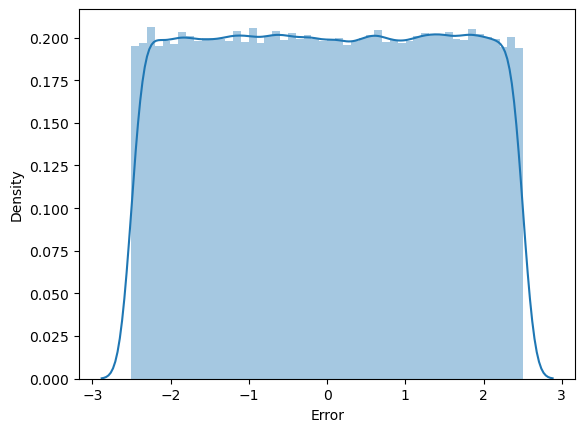

In [35]:
sns.distplot(result["Error"],bins=50)
plt.show()

In [36]:
from sklearn.linear_model  import Ridge

In [37]:
ridge=Ridge(alpha=0.5)

In [38]:
ridge.fit(x_train,y_train)

Ridge(alpha=0.5)

In [39]:
ridge_pred=ridge.predict(x_test)

In [40]:
ridge_pred

array([7.38040182, 6.73462638, 7.15968618, ..., 5.39517347, 7.51622468,
       7.31397281])

In [41]:
result["Ridge_prediction"]= ridge_pred
result

,Base_Model,Actual_value,Error,Ridge_prediction
0,7.380402,9.816470,-2.436068,7.380402
1,6.734626,4.635369,2.099257,6.734626
2,7.159686,7.495611,-0.335925,7.159686
3,8.151284,8.154379,-0.003095,8.151284
4,7.488301,5.265027,2.223274,7.488301
...,...,...,...,...
199995,6.062717,4.016022,2.046694,6.062717
199996,7.119970,7.816791,-0.696821,7.119970
199997,5.395172,4.458050,0.937123,5.395173
199998,7.516225,6.638206,0.878019,7.516225


In [42]:
ridge.score(x_train,y_train)

0.324789234167976

In [43]:
ridge.score(x_test,y_test)

0.32135441287091215

In [44]:
prediction=lr.predict(x_test)

In [45]:
r2=r2_score(prediction,y_test)

In [46]:
r2

-1.0814130836674596

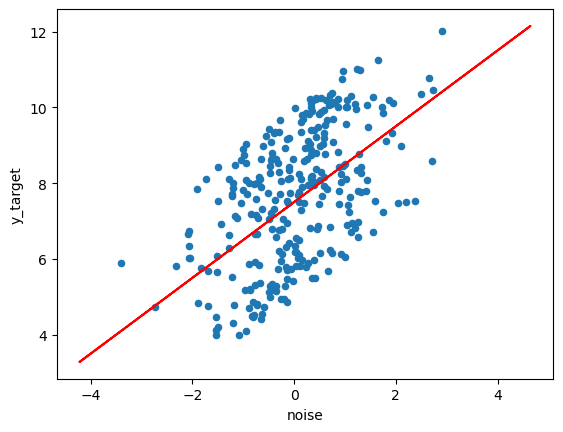

In [47]:
#Visualize regression line
df.sample(n=300).plot(kind="scatter",x="noise",y="y_target")
plt.plot(x_test,y_pred,"r")
plt.show()

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

ridge = Ridge()
params = {'alpha': [0.1, 1, 10], 'max_iter': [1000, 5000]}
grid_search = GridSearchCV(ridge, params, cv=5)
grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'alpha': 10, 'max_iter': 1000}
Best Score: 0.3247750507728235


In [49]:
lr=LinearRegression()
alpha=10,
max_iter=1000


In [50]:
lr.fit(x_train,y_train)

LinearRegression()

In [51]:
lr.score(x_train,y_train)

0.324789234168103

# Conclusion:
1. Linear Regression performs similarly on training and testing sets (R2 = 0.32), indicating no significant overfitting.
2. Ridge Regression's training score remains the same (R2 = 0.32), but testing score drops to -1.09, suggesting severe overfitting.

# Summary:

Linear Regression:
- Training R2: 0.32
- Testing R2: 0.32
- Coefficients and intercept provide insight into linear relationships

Ridge Regression:
- Training R2: 0.32
- Testing R2: -1.09 (severe overfitting)
- Hyperparameter tuning may be necessary to avoid overfitting

Insights and Recommendations:
1. Linear Regression provides a baseline performance.
2. Ridge Regression's poor testing performance suggests:
    - Overfitting due to high model complexity.
    - Inadequate regularization (alpha value).
    - Hyperparameter tuning for Ridge Regression (alpha, iterations).
    